In [1]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [5]:
# CODE HERE
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


#  Exploratory Data Analysis



In [6]:
# CODE HERE
df[df.isnull()].count()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

<Axes: xlabel='Churn', ylabel='count'>

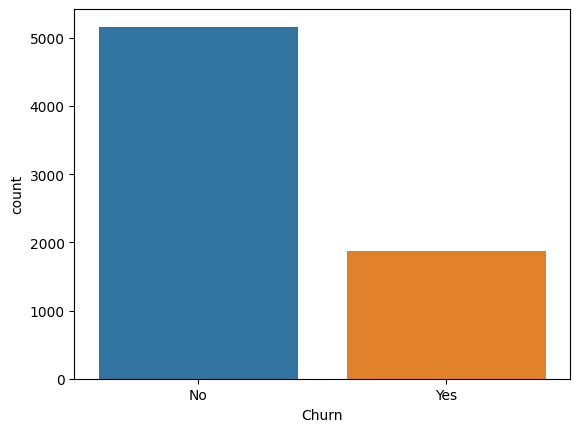

In [7]:
# CODE HERE
sns.countplot(data=df,x='Churn',hue='Churn')

**Explore the distrbution of TotalCharges between Churn categories with a  Violin Plot.**

<Axes: xlabel='Churn', ylabel='TotalCharges'>

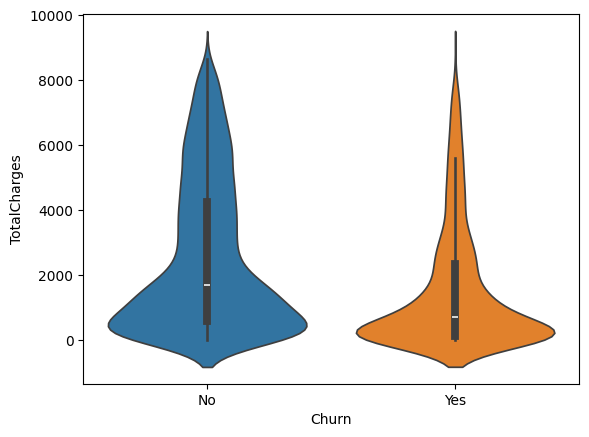

In [8]:
# CODE HERE
sns.violinplot(x='Churn',y='TotalCharges',data=df,hue='Churn')

**Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

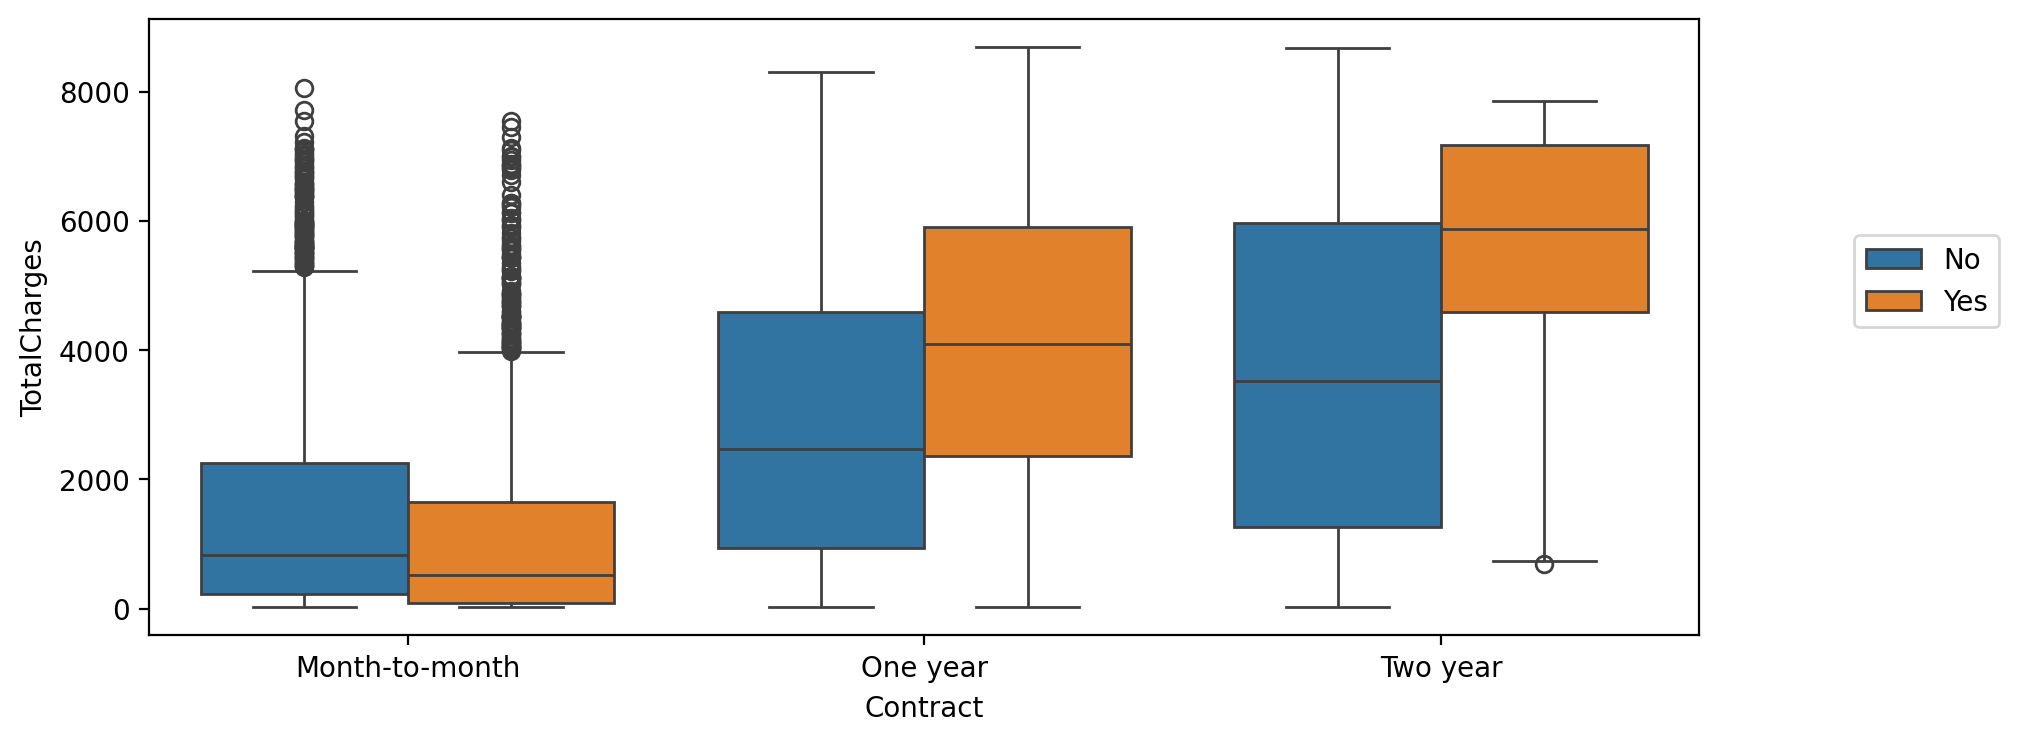

In [9]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.boxplot(y='TotalCharges',x='Contract',data=df,hue='Churn')
plt.legend(loc=(1.1,0.5))

**Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']



In [10]:
#CODE HERE
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
s=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']],drop_first=True,dtype='int').corr()

In [12]:
s['Churn_Yes'].sort_values().iloc[1:-1]

OnlineSecurity_No internet service      -0.227578
DeviceProtection_No internet service    -0.227578
TechSupport_No internet service         -0.227578
StreamingTV_No internet service         -0.227578
StreamingMovies_No internet service     -0.227578
InternetService_No                      -0.227578
OnlineBackup_No internet service        -0.227578
Contract_One year                       -0.178225
OnlineSecurity_Yes                      -0.171270
TechSupport_Yes                         -0.164716
Dependents_Yes                          -0.163128
Partner_Yes                             -0.149982
PaymentMethod_Credit card (automatic)   -0.134687
PaymentMethod_Mailed check              -0.090773
OnlineBackup_Yes                        -0.082307
DeviceProtection_Yes                    -0.066193
MultipleLines_No phone service          -0.011691
gender_Male                             -0.008545
PhoneService_Yes                         0.011691
MultipleLines_Yes                        0.040033


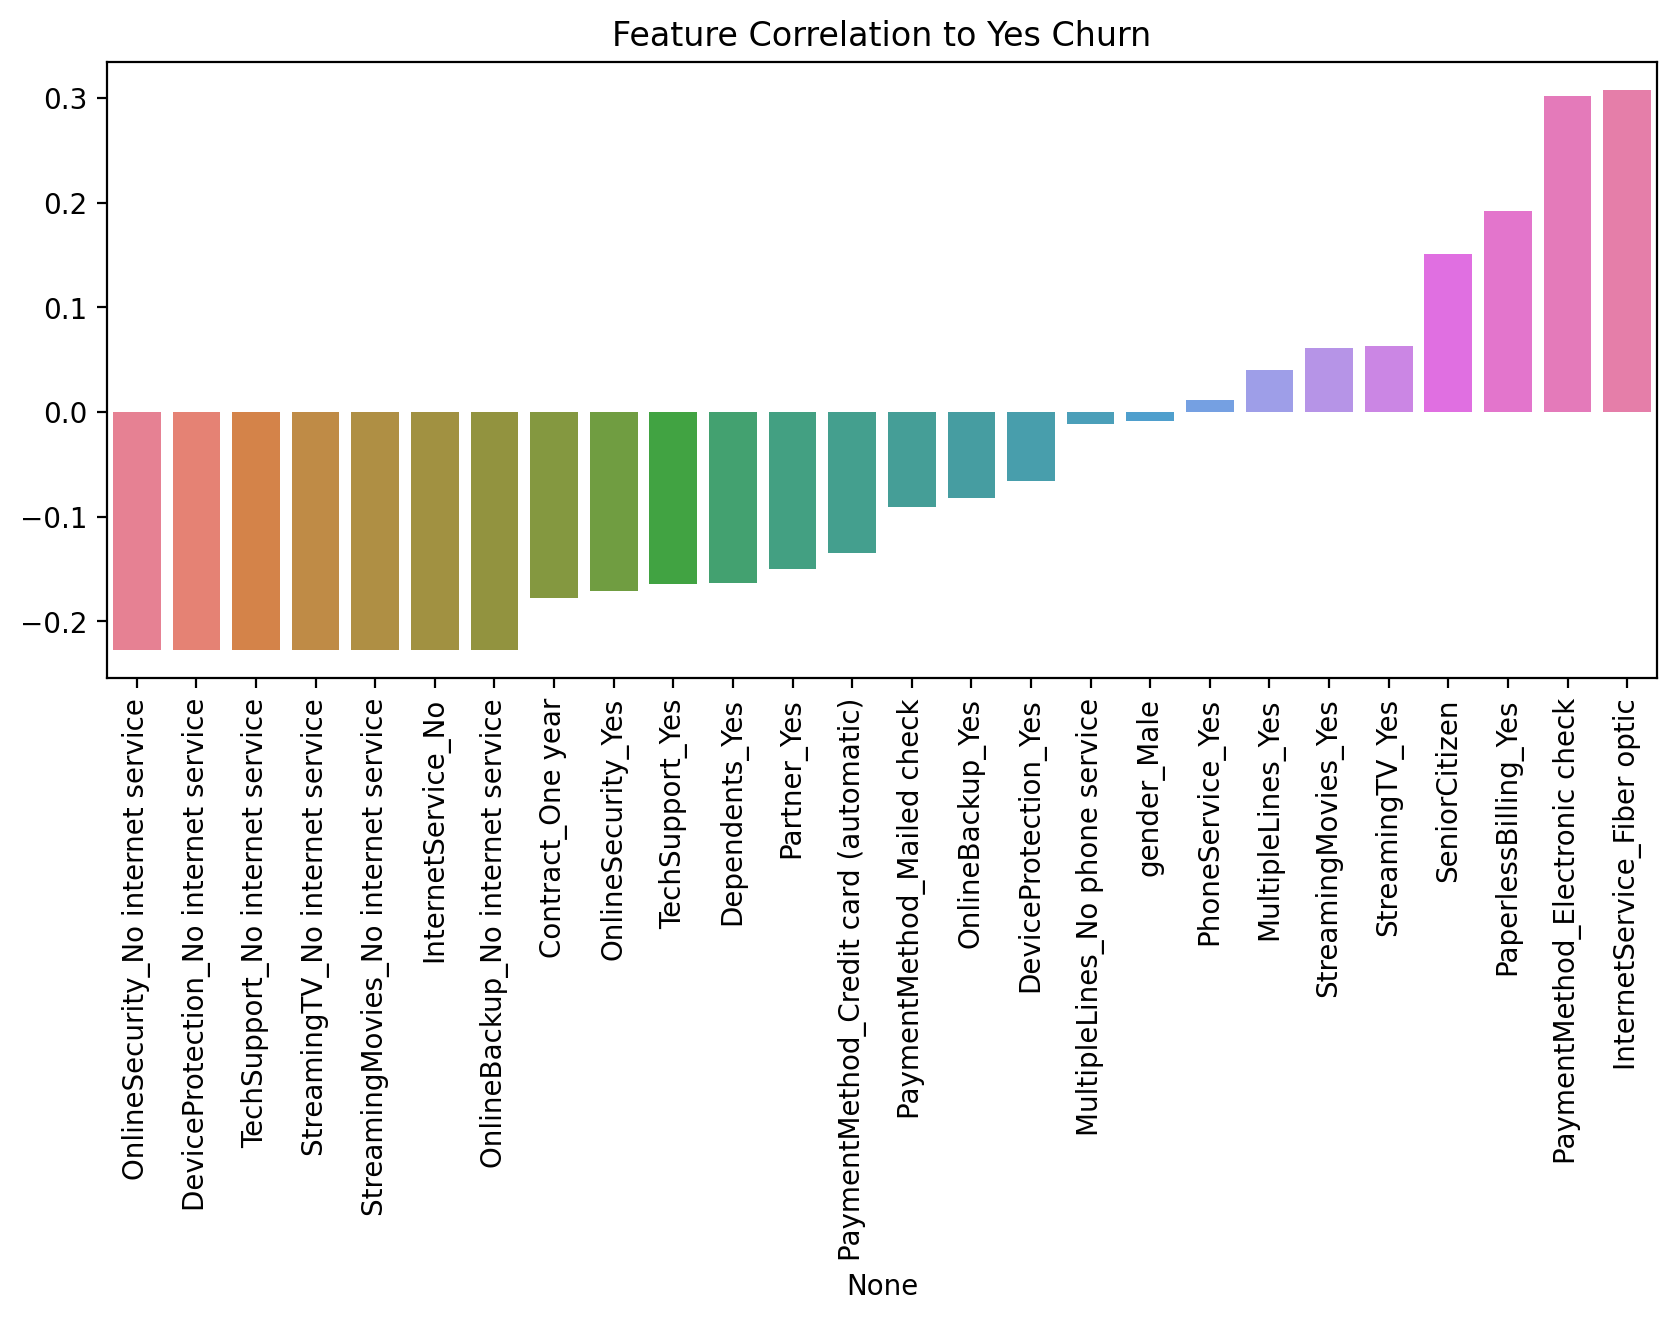

In [13]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=s['Churn_Yes'].sort_values().iloc[1:-1].index,y=s['Churn_Yes'].sort_values().iloc[1:-1].values,hue=s['Churn_Yes'].sort_values().iloc[1:-1].index)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);


# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**What are the 3 contract types available?**

In [14]:
# CODE HERE
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

**Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<Axes: xlabel='tenure', ylabel='Count'>

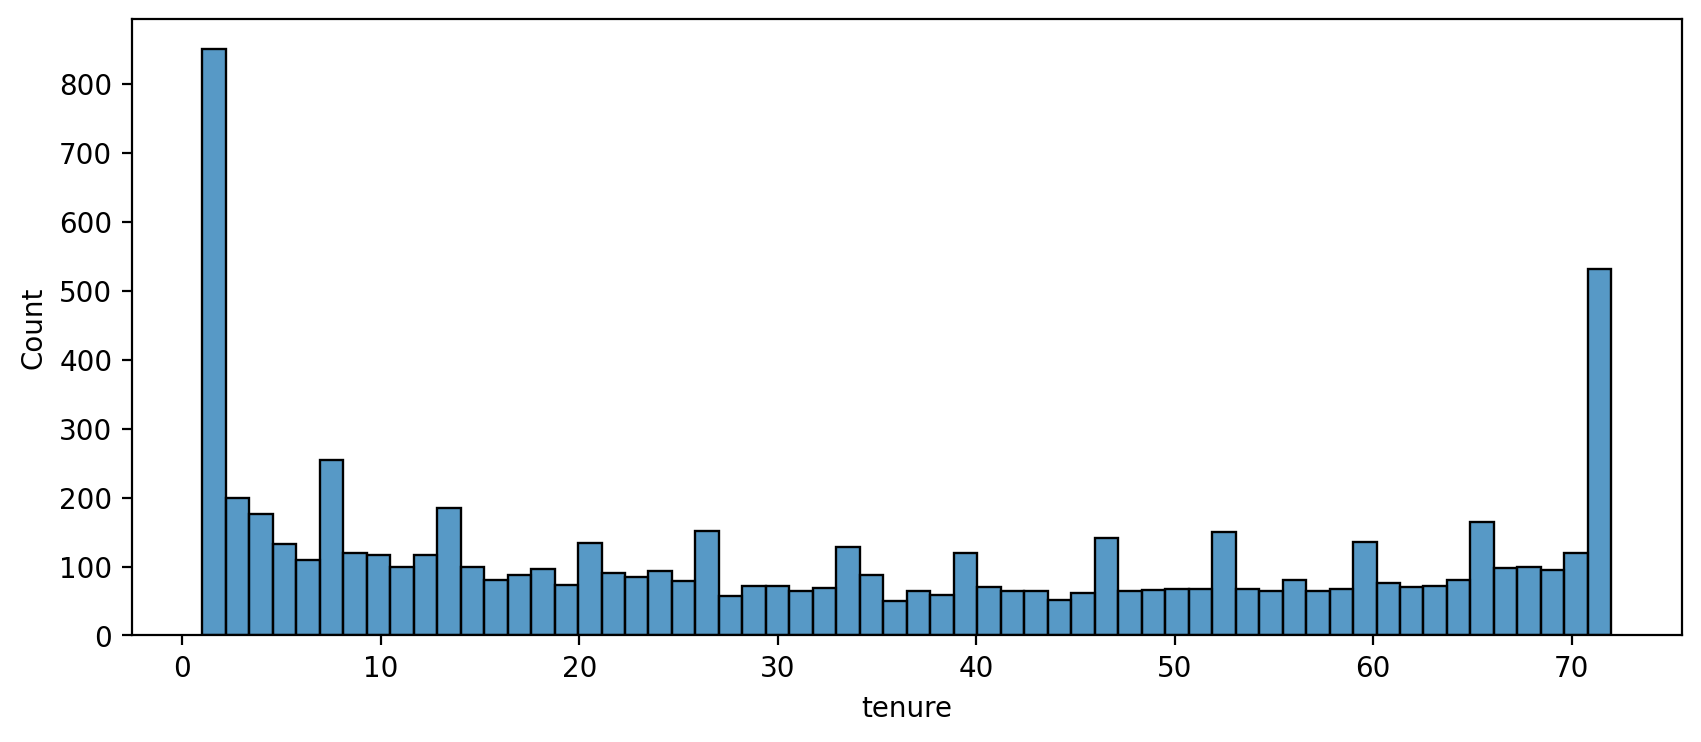

In [15]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='tenure',bins=60)

**Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

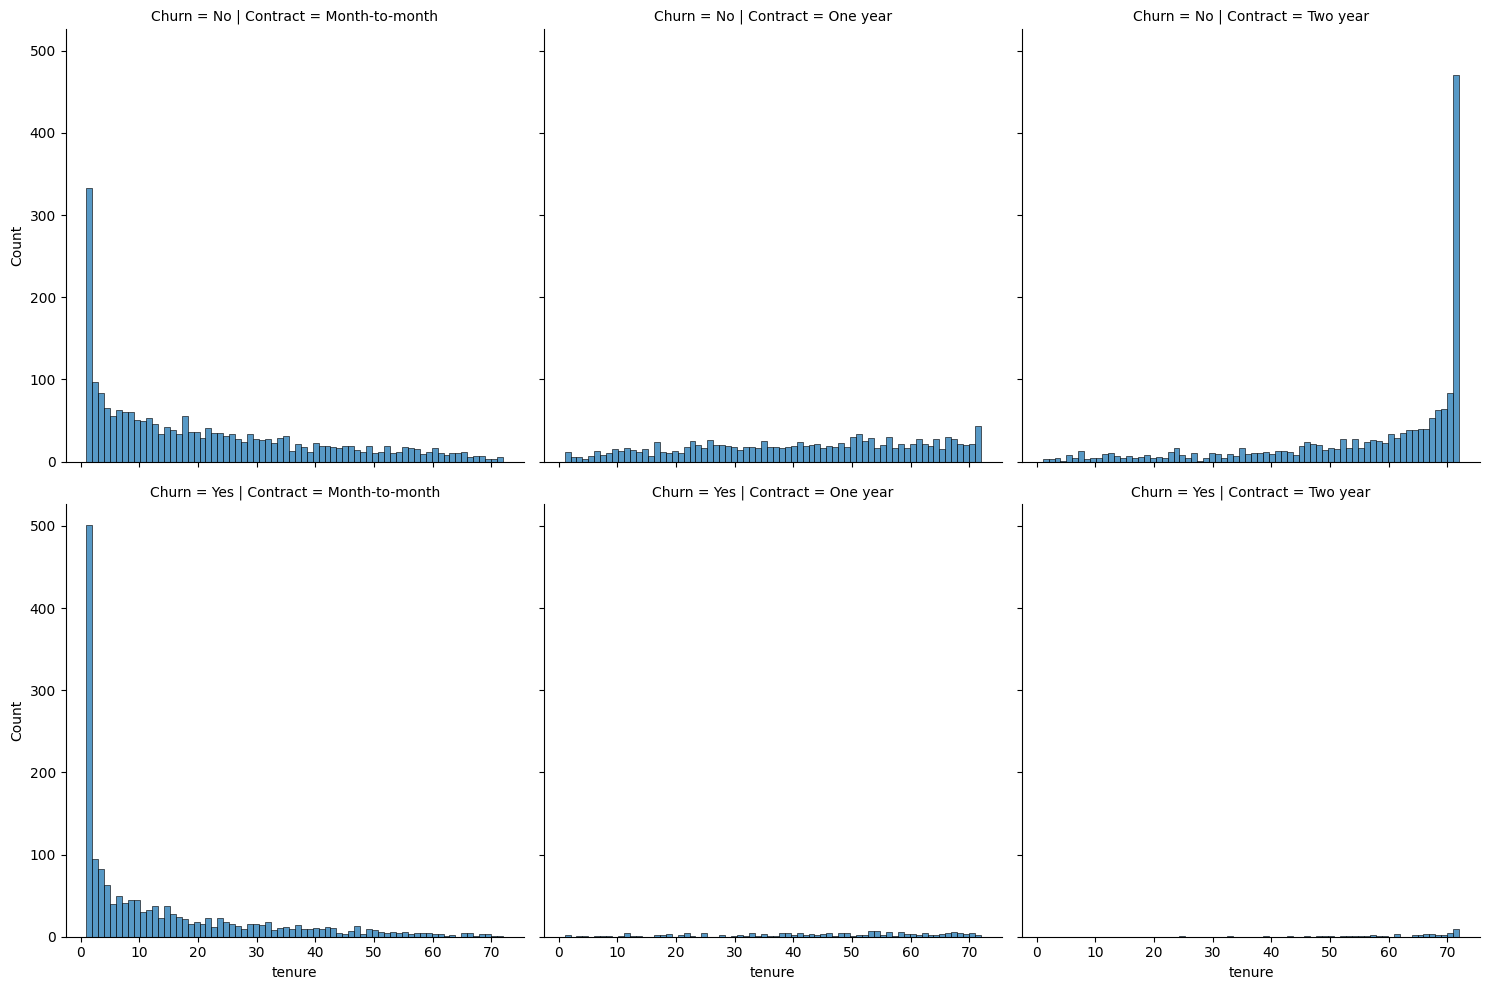

In [16]:
#CODE HERE
sns.displot(data=df,x='tenure',bins=70,col='Contract',row='Churn');


**Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

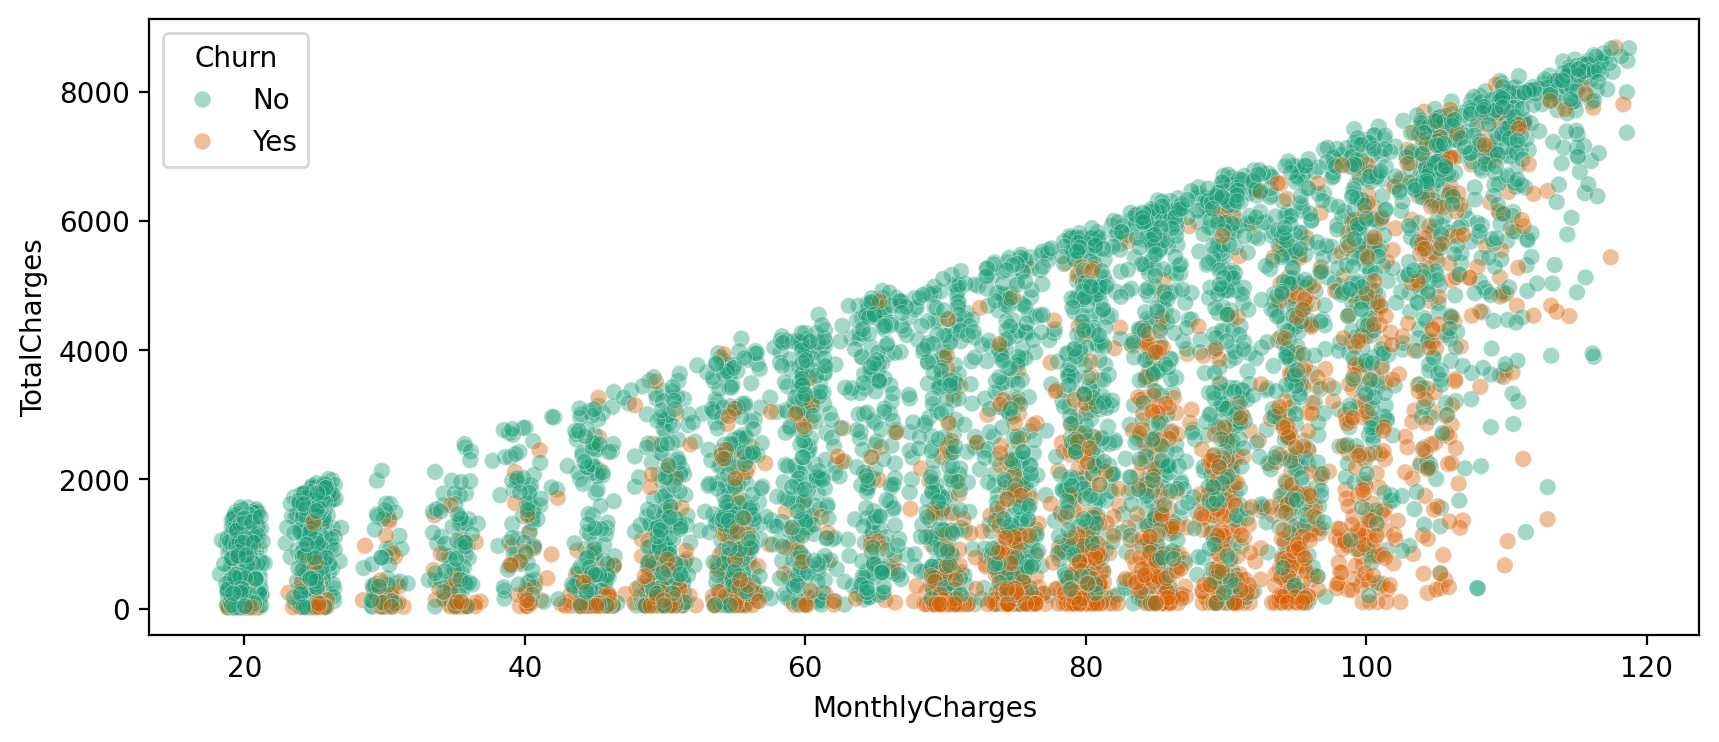

In [17]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.4,linewidth=0.3,palette='Dark2')

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [18]:
#CODE HERE
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']
no_churn =  df.groupby(['Churn','tenure']).count().transpose()['No']

In [19]:
yes_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


**Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

<Axes: xlabel='tenure'>

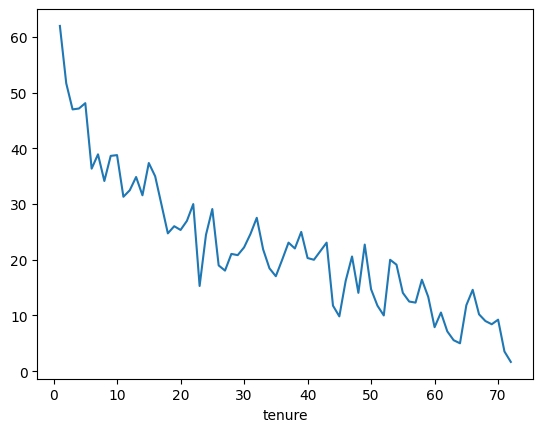

In [20]:
# no_churn
churn_rate = 100 * yes_churn/(no_churn + yes_churn)
churn_rate.transpose()['customerID'].plot()

In [21]:
#CODE HERE

### Broader Cohort Groups
**Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [22]:
def cohort(tenure):
    if tenure<13:
        return '0-12 Months'
    elif tenure<25:
        return '12-24 Months'
    elif tenure<49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'
        
    
    

In [23]:
df['TenureCohort'] = df['tenure'].apply(cohort)

In [24]:
# df[['TenureCohort','tenure']]

**Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

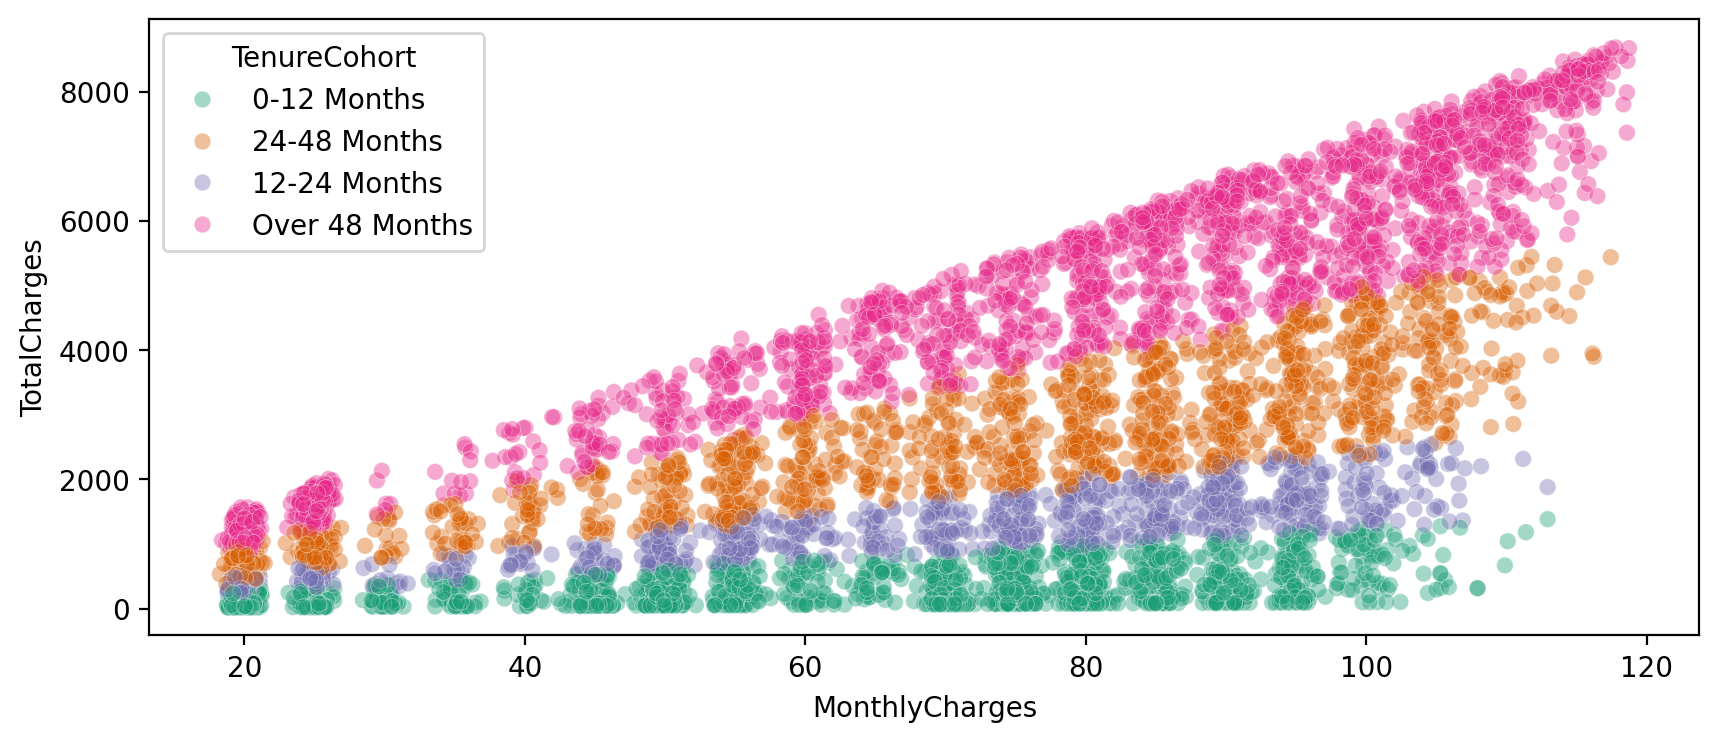

In [25]:
#CODE HERE
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='TenureCohort',alpha=0.4,linewidth=0.3,palette='Dark2')

**Create a count plot showing the churn count per cohort.**

<Axes: xlabel='TenureCohort', ylabel='count'>

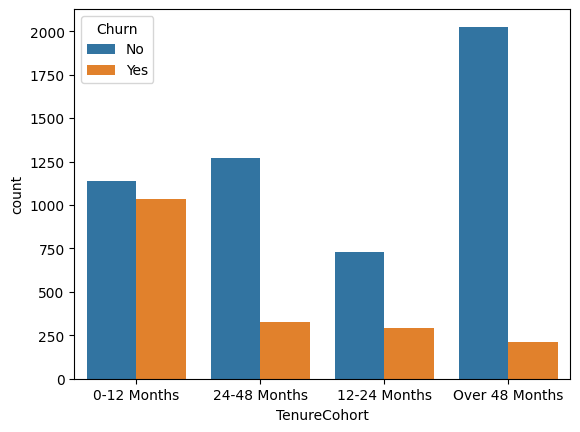

In [26]:
# CODE HERE
sns.countplot(data=df,x='TenureCohort',hue='Churn')

**Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

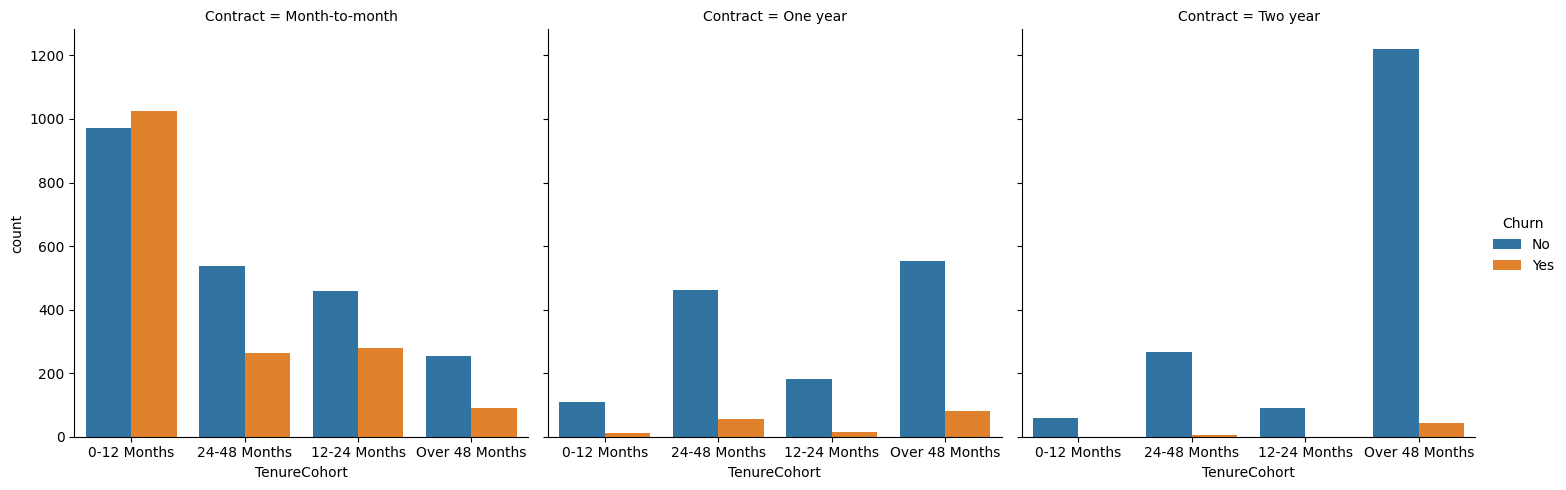

In [27]:
#CODE HERE
sns.catplot(data = df,x = 'TenureCohort',hue='Churn',kind='count',col='Contract')

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [28]:
#CODE HERE
X = df.drop(['Churn','customerID'],axis=1)
X=pd.get_dummies(X,drop_first=True,dtype='int')
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureCohort_12-24 Months,TenureCohort_24-48 Months,TenureCohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,1,0,1,0,0,1,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,1,0,1,1,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [29]:
y = df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7027     No
7028     No
7029     No
7030    Yes
7031     No
Name: Churn, Length: 7032, dtype: object

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
 X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.1, random_state=101)

**Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.


In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dt =DecisionTreeClassifier(max_depth=6)

In [34]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [35]:
preds = dt.predict(X_test)

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,confusion_matrix,accuracy_score

In [37]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



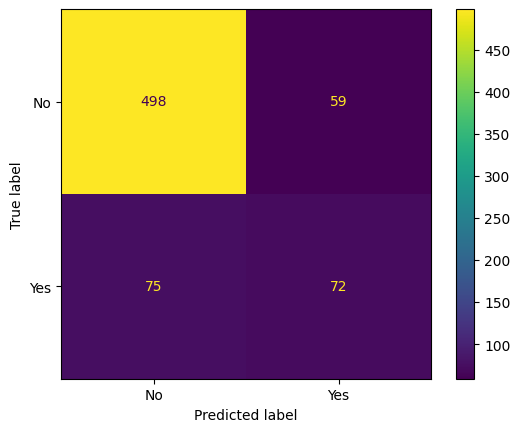

In [38]:
ConfusionMatrixDisplay.from_estimator(dt,X_test,y_test)

In [39]:
imp_feats = pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['Feature Importance']).sort_values("Feature Importance")

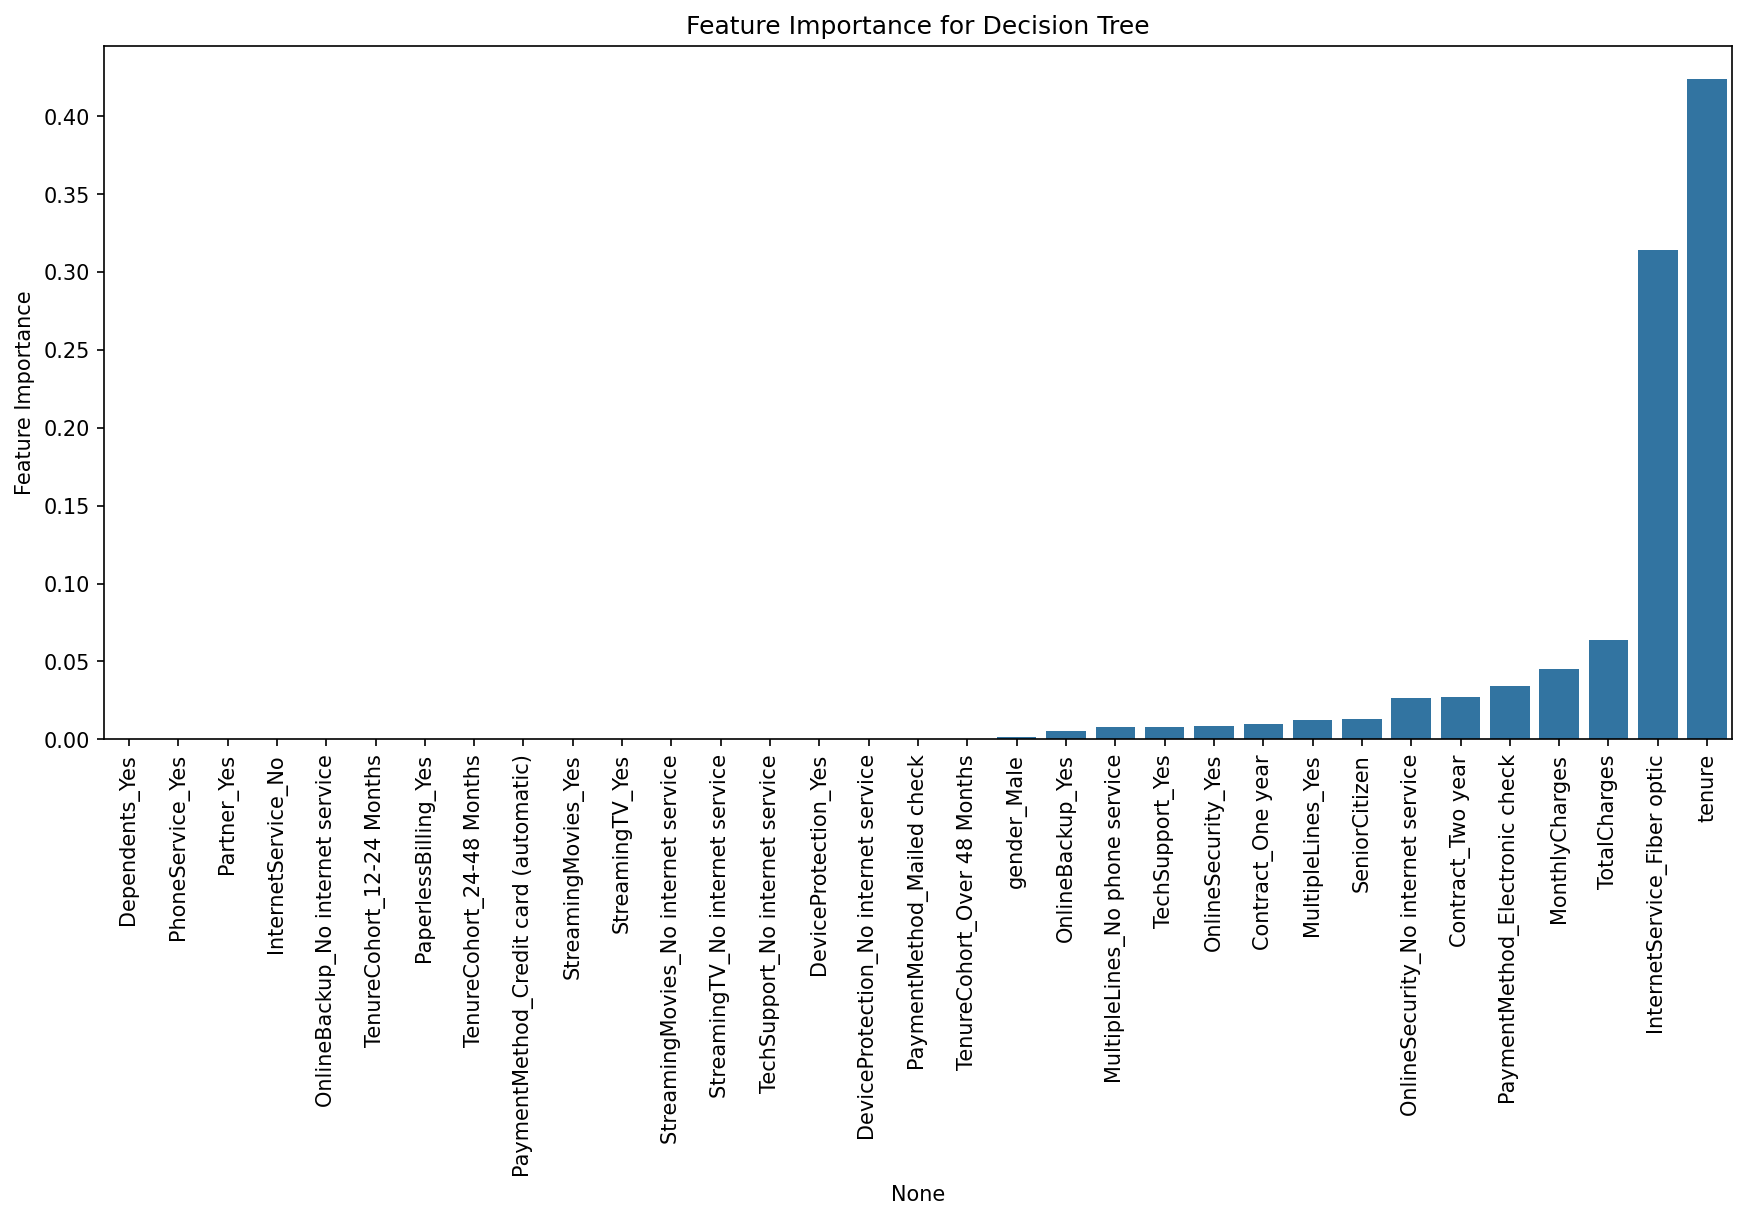

In [40]:
plt.figure(figsize=(14,6),dpi=150)
sns.barplot(data=imp_feats.sort_values('Feature Importance'),x=imp_feats.sort_values('Feature Importance').index,y='Feature Importance')
plt.xticks(rotation=90)
plt.title("Feature Importance for Decision Tree");

In [41]:
from sklearn.tree import plot_tree

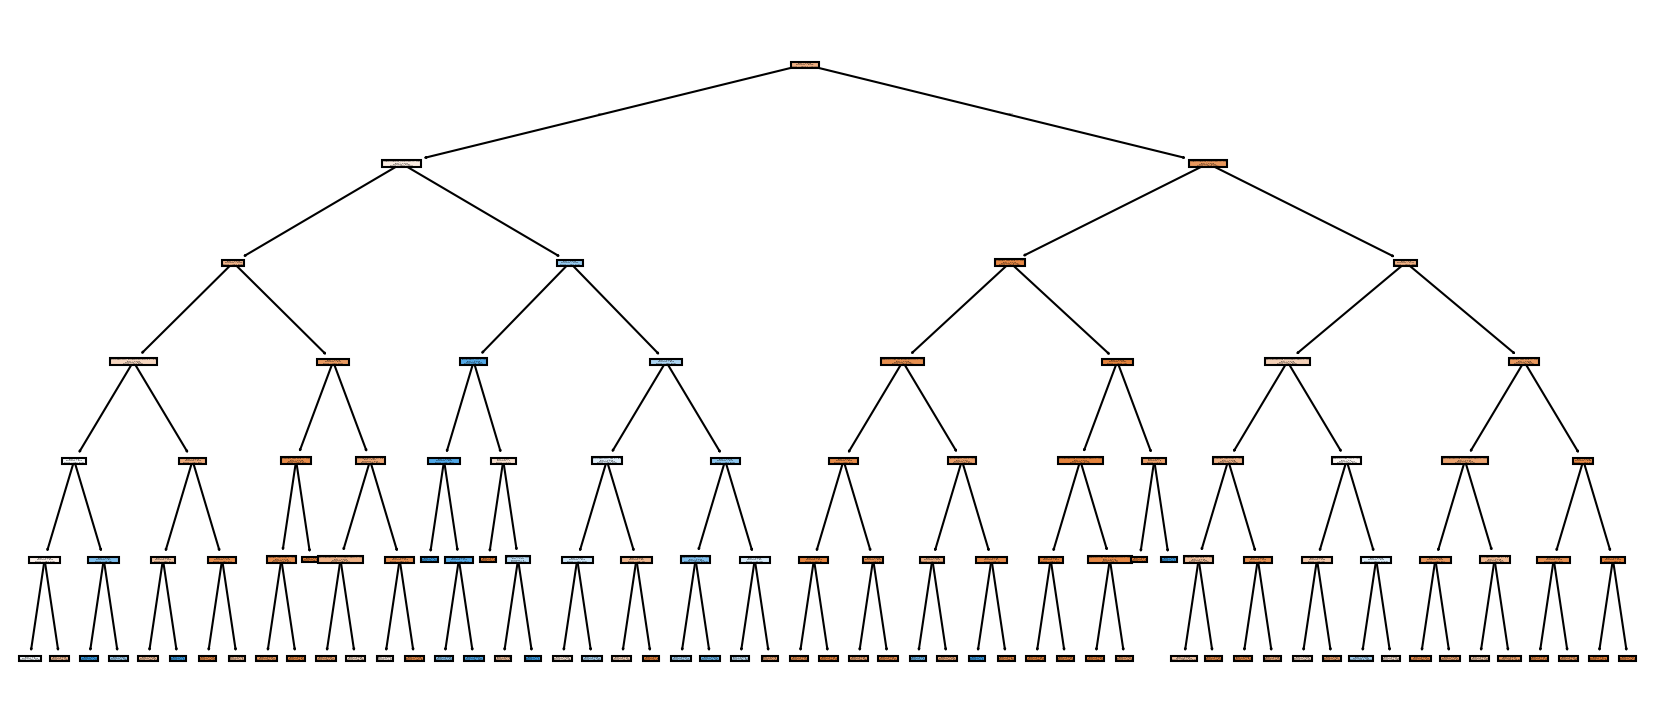

In [42]:
plt.figure(figsize=(14,6),dpi=150)
plot_tree(dt,filled=True,feature_names=X.columns);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier()

In [45]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [46]:
preds = rf.predict(X_test)

In [47]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.88       557
         Yes       0.53      0.47      0.50       147

    accuracy                           0.80       704
   macro avg       0.70      0.68      0.69       704
weighted avg       0.79      0.80      0.80       704



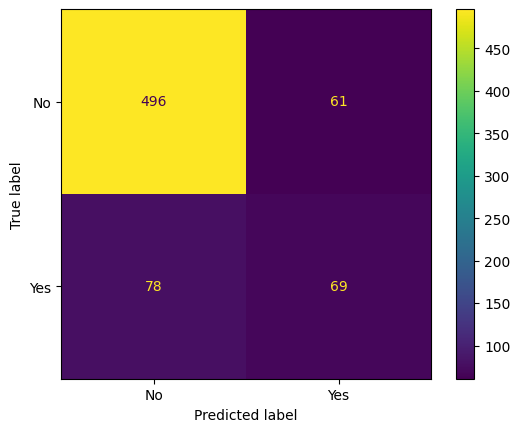

In [48]:
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [49]:
#CODE HERE
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
grad_model = GradientBoostingClassifier()

In [51]:
grad_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [52]:
preds = grad_model.predict(X_test)

In [53]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



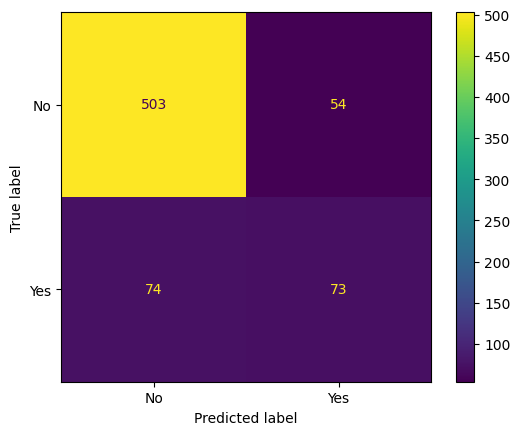

In [54]:
ConfusionMatrixDisplay.from_estimator(grad_model,X_test,y_test)

In [64]:
from sklearn.model_selection import GridSearchCV

In [56]:
param_grid = {'learning_rate':[0.1,0.5,0.7],'n_estimators':[50,100,150],'max_depth':[3,4,2]}

In [57]:
grid = GridSearchCV(grad_model,param_grid)

In [58]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.5, 0.7],
                         'max_depth': [3, 4, 2],
                         'n_estimators': [50, 100, 150]})

In [59]:
grid.best_params_


{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

In [60]:
preds = grid.predict(X_test)

In [61]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.87      0.92      0.90       557
         Yes       0.62      0.50      0.55       147

    accuracy                           0.83       704
   macro avg       0.75      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



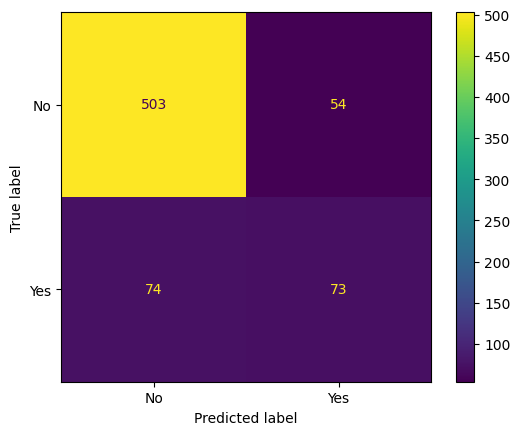

In [63]:
ConfusionMatrixDisplay.from_estimator(grad_model,X_test,y_test)